In [1]:
# Import packages
import numpy as np
import os
import pandas as pd
import random as rm
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from math import gamma, exp, log, log10, pi
import seaborn as sns
from astropy.io import fits
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord

In [2]:
# Set up matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import MultipleLocator
import mpl_scatter_density
%matplotlib inline
params = {'legend.fontsize': 22,
          'figure.figsize': (12, 8),
         'axes.labelsize': 22,
         'axes.titlesize': 24,
         'xtick.labelsize': 18,
         'ytick.labelsize': 18}
plt.rcParams.update(params)

In [3]:
# "Viridis-like" colormap with white background
white_viridis = mpl.colors.LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'), ], N=256)

## Import data

In [4]:
data = Table.read('../Data_tabs/Euclid_morpho_challenge/overlap_March2022/challenge_5sig_overlap_realistic.fits', format='fits')
df = data.to_pandas()

In [5]:
df

,Truemag,Truere,Truen,Trueq,Predre_SE++,Predreerr_SE++,Predn_SE++,Prednerr_SE++,Predq_SE++,Predqerr_SE++,...,Predn_profit,Prednerr_profit,Predq_profit,Predqerr_profit,Predre_gala,Predreerr_gala,Predn_gala,Prednerr_gala,Predq_gala,Predqerr_gala
0,23.7413,0.555198,0.717347,0.284707,0.435004,0.352887,1.224491,0.188127,0.493089,0.043344,...,1.391338,0.054369,0.444434,0.029507,0.450121,0.423017,1.420140,0.203472,0.456705,0.033932
1,24.1312,0.229545,1.190065,0.569964,0.229193,0.138306,0.669820,0.146241,0.394318,0.047835,...,0.500000,0.409827,0.361989,0.053869,0.222423,0.115574,0.360178,0.179230,0.314090,0.049679
2,24.4125,0.328009,0.996686,0.561286,0.460535,0.782042,1.091038,0.324469,0.558608,0.116500,...,0.906534,0.304245,0.608280,0.272179,0.613432,1.883410,1.740980,0.619839,0.460458,0.092187
3,24.7742,0.186533,2.103571,0.563326,0.175447,0.191401,0.705327,0.222422,0.447351,0.097678,...,1.246858,0.562503,0.292792,0.103242,0.167905,0.181881,0.479820,0.444120,0.271091,0.095001
4,24.4378,0.182902,0.757104,0.193000,0.318374,0.423400,1.410654,0.384091,0.323865,0.064477,...,2.973399,0.108519,0.212458,0.100356,0.383740,0.906356,2.451550,0.906073,0.239423,0.060358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204224,22.9315,0.479989,2.559690,0.378295,0.546356,0.335416,1.714000,0.169801,0.305825,0.017803,...,1.481490,0.038702,0.287236,0.027283,0.590453,0.429773,2.047370,0.189623,0.278808,0.014168
204225,23.7671,0.076027,2.678464,0.493809,0.113792,0.070517,1.628590,0.270042,0.716698,0.053703,...,1.745099,0.081673,0.676298,0.035591,0.098332,0.066792,2.477060,0.579692,0.645200,0.058237
204226,24.6180,0.355579,2.688461,0.273177,0.460334,1.108703,1.751666,0.615776,0.376268,0.110698,...,0.731001,0.483319,0.329181,0.983945,38.221700,2439.110000,12.000000,17.012600,0.133611,0.037669
204227,23.2955,0.394936,2.312156,0.898290,0.407291,0.200428,1.046612,0.112379,0.528638,0.030808,...,1.071643,0.057286,0.509345,0.017498,0.417688,0.230519,1.205070,0.110846,0.504712,0.024439


In [6]:
df.columns

Index(['Truemag', 'Truere', 'Truen', 'Trueq', 'Predre_SE++', 'Predreerr_SE++',
       'Predn_SE++', 'Prednerr_SE++', 'Predq_SE++', 'Predqerr_SE++',
       'Predre_profit', 'Predreerr_profit', 'Predn_profit', 'Prednerr_profit',
       'Predq_profit', 'Predqerr_profit', 'Predre_gala', 'Predreerr_gala',
       'Predn_gala', 'Prednerr_gala', 'Predq_gala', 'Predqerr_gala'],
      dtype='object')

In [7]:
mag = df['Truemag']
mag_bins = np.linspace(20.25,25.25,11)
centers = 0.5*(mag_bins[1:]+mag_bins[:-1])

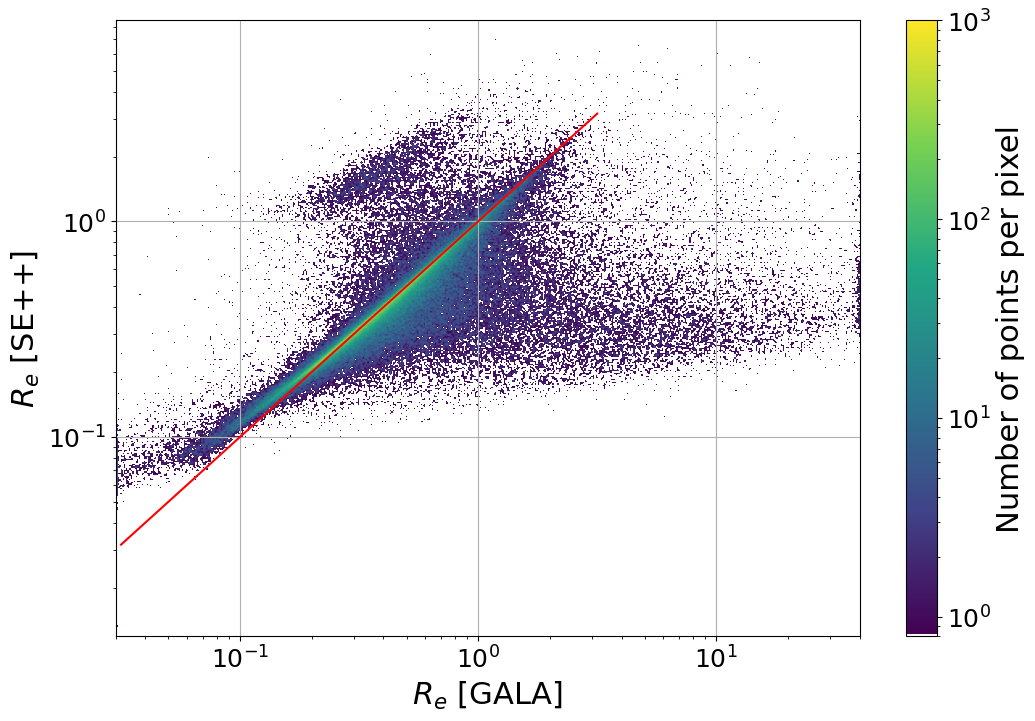

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

x, y = df['Predre_SE++'], df['Predre_gala']
density = ax.scatter_density(y, x, norm=mpl.colors.LogNorm(vmin=0.8, vmax=1000), cmap=white_viridis)

plt.plot(np.logspace(-1.5,0.5,10), np.logspace(-1.5,0.5,10), c='r')

fig.colorbar(density, label='Number of points per pixel')

plt.xlabel(r'$R_e$ [GALA]')
plt.ylabel(r'$R_e$ [SE++]')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

20.25 20.75 -0.006 0.072
20.75 21.25 -0.002 0.056
21.25 21.75 -0.001 0.051
21.75 22.25 -0.002 0.050
22.25 22.75 -0.003 0.061
22.75 23.25 -0.006 0.080
23.25 23.75 -0.012 0.108
23.75 24.25 -0.020 0.160
24.25 24.75 -0.034 0.258
24.75 25.25 -0.036 0.397


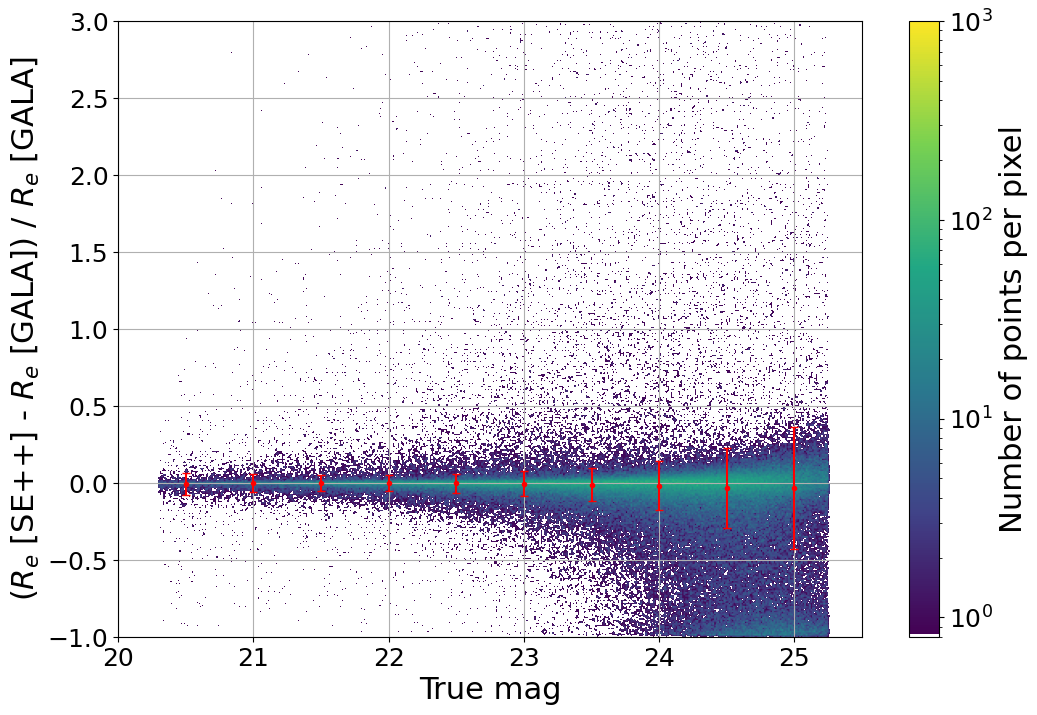

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

x, y = df['Predre_SE++'], df['Predre_gala']
change = (x-y)/y
density = ax.scatter_density(mag, change, norm=mpl.colors.LogNorm(vmin=0.8, vmax=1000), cmap=white_viridis)

fig.colorbar(density, label='Number of points per pixel')

B, D = np.zeros(len(mag_bins)-1), np.zeros(len(mag_bins)-1)

for k in range(len(mag_bins)-1):
    m1, m2 = mag_bins[k], mag_bins[k+1]
    df_mag = df[(df.Truemag >= m1) & (df.Truemag < m2)]
    x, y = df_mag['Predre_SE++'], df_mag['Predre_gala']
    change = (x-y)/y
    B[k] = np.median(change)
    D[k] = np.quantile(np.abs(change)-B[k], 0.68)
    print(m1, m2, '%1.3f' %B[k], '%1.3f' %D[k])
     
plt.errorbar(centers, B, yerr=D, markersize=3, color='r', capsize=3, fmt='o')

plt.xlabel('True mag')
plt.ylabel(r'($R_e$ [SE++] - $R_e$ [GALA]) / $R_e$ [GALA]')
plt.xlim(20,25.5)
plt.ylim(-1,3)
plt.grid()
plt.show()

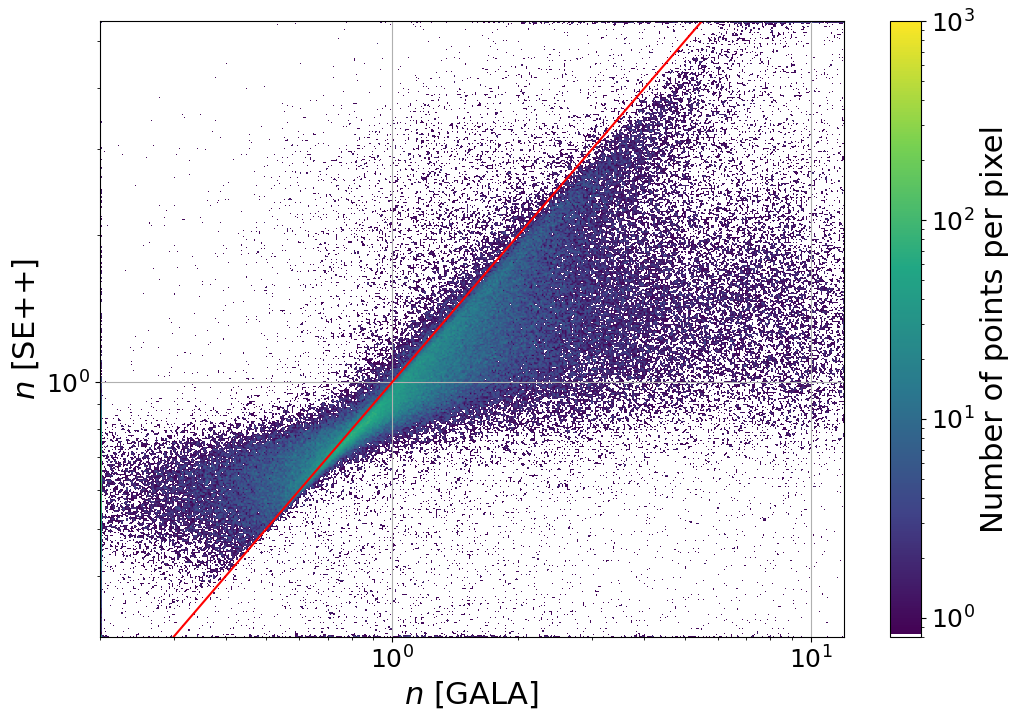

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

x, y = df['Predn_SE++'], df['Predn_gala']
density = ax.scatter_density(y, x, norm=mpl.colors.LogNorm(vmin=0.8, vmax=1000), cmap=white_viridis)

plt.plot(np.logspace(-1.0,1.0,10), np.logspace(-1.0,1.0,10), c='r')

fig.colorbar(density, label='Number of points per pixel')

plt.xlabel(r'$n$ [GALA]')
plt.ylabel(r'$n$ [SE++]')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

20.25 20.75 -0.033 0.103
20.75 21.25 -0.025 0.081
21.25 21.75 -0.021 0.067
21.75 22.25 -0.021 0.069
22.25 22.75 -0.024 0.080
22.75 23.25 -0.031 0.105
23.25 23.75 -0.042 0.149
23.75 24.25 -0.059 0.240
24.25 24.75 -0.093 0.439
24.75 25.25 -0.150 0.684


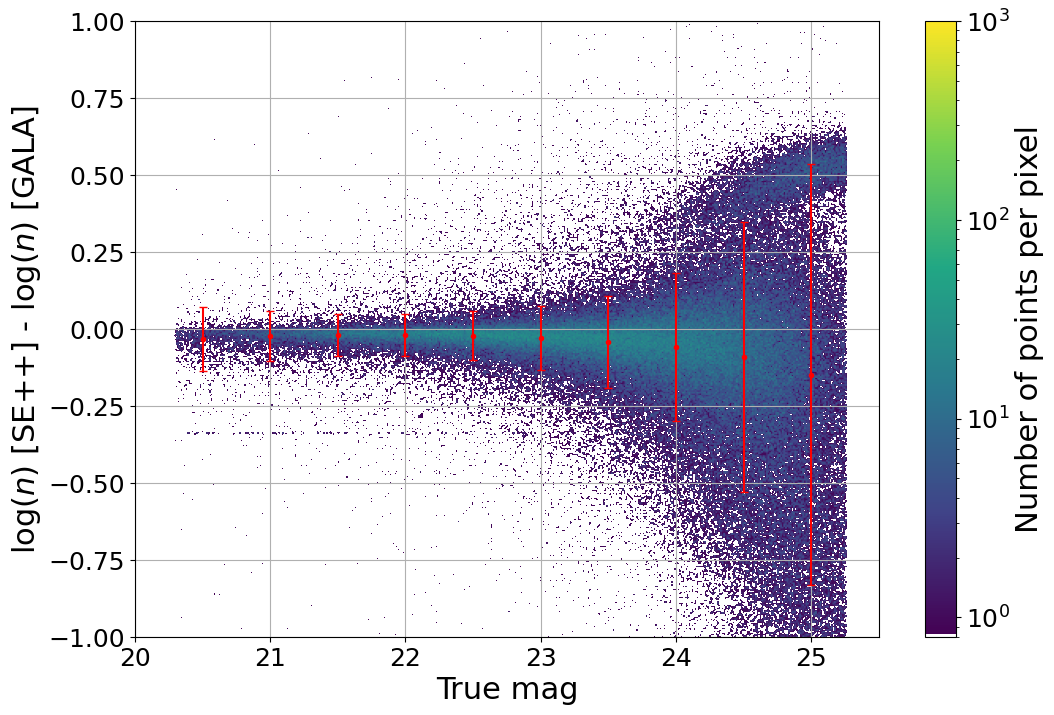

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

x, y = df['Predn_SE++'], df['Predn_gala']
change = np.log10(x) - np.log10(y)
density = ax.scatter_density(mag, change, norm=mpl.colors.LogNorm(vmin=0.8, vmax=1000), cmap=white_viridis)
                           
fig.colorbar(density, label='Number of points per pixel')

B, D = np.zeros(len(mag_bins)-1), np.zeros(len(mag_bins)-1)

for k in range(len(mag_bins)-1):
    m1, m2 = mag_bins[k], mag_bins[k+1]
    df_mag = df[(df.Truemag >= m1) & (df.Truemag < m2)]
    x, y = df_mag['Predn_SE++'], df_mag['Predn_gala']
    change = np.log10(x) - np.log10(y)
    B[k] = np.median(change)
    D[k] = np.quantile(np.abs(change)-B[k], 0.68)
    print(m1, m2, '%1.3f' %B[k], '%1.3f' %D[k])
     
plt.errorbar(centers, B, yerr=D, markersize=3, color='r', capsize=3, fmt='o')


plt.xlabel('True mag')
plt.ylabel(r'$\log(n)$ [SE++] - $\log(n)$ [GALA]')
plt.xlim(20,25.5)
plt.ylim(-1,1)
plt.grid()
plt.show()

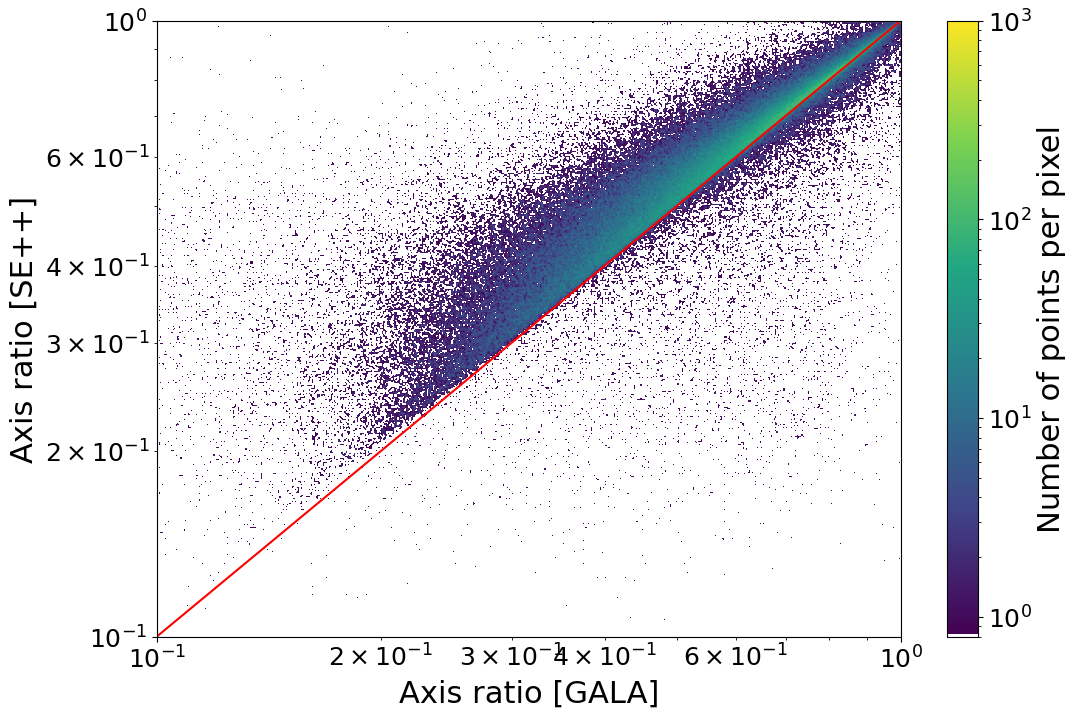

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

x, y = df['Predq_SE++'], df['Predq_gala']
density = ax.scatter_density(y, x, norm=mpl.colors.LogNorm(vmin=0.8, vmax=1000), cmap=white_viridis)

plt.plot(np.logspace(-1,0,10), np.logspace(-1,0,10), c='r')

fig.colorbar(density, label='Number of points per pixel')

plt.xlabel(r'Axis ratio [GALA]')
plt.ylabel(r'Axis ratio [SE++]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,1)
plt.ylim(0.1,1)
plt.grid()
plt.show()

20.25 20.75 0.009 0.009
20.75 21.25 0.009 0.008
21.25 21.75 0.009 0.008
21.75 22.25 0.010 0.007
22.25 22.75 0.012 0.008
22.75 23.25 0.015 0.009
23.25 23.75 0.022 0.012
23.75 24.25 0.034 0.017
24.25 24.75 0.056 0.028
24.75 25.25 0.094 0.049


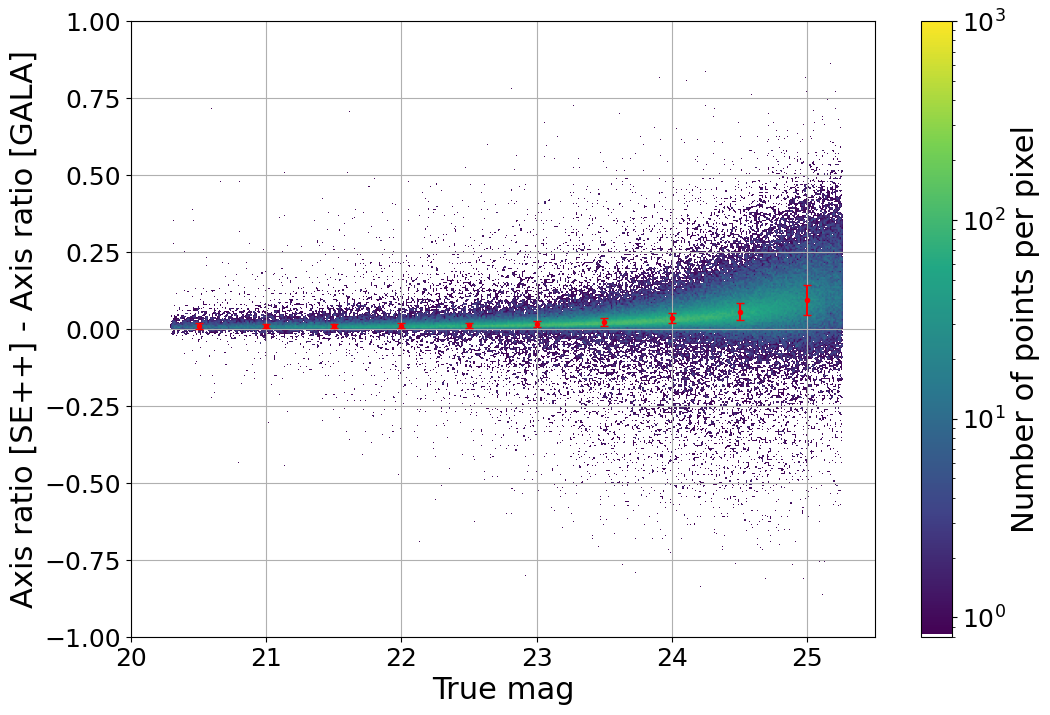

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

x, y = df['Predq_SE++'], df['Predq_gala']
change = x-y
density = ax.scatter_density(mag, change, norm=mpl.colors.LogNorm(vmin=0.8, vmax=1000), cmap=white_viridis)
                           
fig.colorbar(density, label='Number of points per pixel')

B, D = np.zeros(len(mag_bins)-1), np.zeros(len(mag_bins)-1)

for k in range(len(mag_bins)-1):
    m1, m2 = mag_bins[k], mag_bins[k+1]
    df_mag = df[(df.Truemag >= m1) & (df.Truemag < m2)]
    x, y = df_mag['Predq_SE++'], df_mag['Predq_gala']
    change = x-y
    B[k] = np.median(change)
    D[k] = np.quantile(np.abs(change)-B[k], 0.68)
    print(m1, m2, '%1.3f' %B[k], '%1.3f' %D[k])
     
plt.errorbar(centers, B, yerr=D, markersize=3, color='r', capsize=3, fmt='o')

plt.xlabel('True mag')
plt.ylabel(r'Axis ratio [SE++] - Axis ratio [GALA]')
plt.xlim(20,25.5)
plt.ylim(-1,1)
plt.grid()
plt.show()